In [10]:
import json

with open('/Users/sunnyyu/Desktop/Children_Speech_Books_NLP/data/data_with_all_info/MERGED_DATA_BOOKS.json', 'r') as file:
    generics_data = json.load(file)

In [2]:
import json

with open('/Users/sunnyyu/Desktop/Children_Speech_Books_NLP/data/features_classification_data/final_classification_data/QUANTIFIERS_BOOKS.json', 'r') as file:
    features = json.load(file)


# for analyzing generics, import features_generics

In [25]:
len(features)

6329

In [14]:
# import the classified file with 1-5 feature categories

with open('/Users/sunnyyu/Desktop/Children_Speech_Books_NLP/code/Python/analysis_files/HABITUAL_FEATURE.json', 'r') as file:
    features = json.load(file)

In [3]:
# merge universal and existential quantifiers

import json

# Load the first JSON file
with open('/Users/sunnyyu/Desktop/research/children_speech_books/code/python/generics/EXISTENTIAL_QUANTIFIERS_FEATURES_BOOKS.json', 'r') as f1:
    data1 = json.load(f1)

# Load the second JSON file
with open('/Users/sunnyyu/Desktop/research/children_speech_books/code/python/generics/UNIVERSAL_QUANTIFIERS_FEATURES_BOOKS.json', 'r') as f2:
    data2 = json.load(f2)

# Merge the data using extend
data1.extend(data2)

# # Save the merged data to a new JSON file
# with open('QUANTIFIERS_BOOKS.json', 'w') as outfile:
#     json.dump(data1, outfile, indent=4)

# print("Files merged successfully!")

In [15]:
sentence_map = {}
for book in generics_data:
    for entry in book:
        sentence = entry['sentence']
        tags = entry.get('tags', [])
        subjects = entry.get('subjects', [])
        age_min = entry['age_min']
        age_max = entry['age_max']
        sentence_map[sentence] = {'tags': tags, 'subjects': subjects, 'age_min': age_min, 'age_max': age_max}

# Combine data
combined_data = []
for feature in features:
    sentence = feature['sentence']
    classification = feature['classification']
    
    # Preprocess classification to convert it to a list of integers
    if classification:
        classification_list = [int(x) for x in classification.split(',')]  # Convert string to list of integers

    # Find the corresponding tags and subjects
    if sentence in sentence_map:
        combined_entry = {
            'sentence': sentence,
            'tags': sentence_map[sentence]['tags'],
            'subjects': sentence_map[sentence]['subjects'],
            'classification': classification_list,  # Store as list of integers
            'age_min': sentence_map[sentence]['age_min'],
            'age_max': sentence_map[sentence]['age_max']
        }
        combined_data.append(combined_entry)


In [8]:
# FOR SPEECH   

# Create a mapping of sentences to their tags and subjects from generics_data
sentence_map = {}
for entry in generics_data:
        sentence = entry['sentence']
        tags = entry.get('tags', [])
        subjects = entry.get('subjects', [])
        age_min = entry['age_min'],
        age_max = entry['age_max'],
        sentence_map[sentence] = {'tags': tags, 'subjects': subjects, 'age_min': age_min, 'age_max': age_max}

# Combine data
combined_data = []
for feature in features:
    sentence = feature['sentence']
    classification = feature['classification']
    if classification:
    # Convert each value to an integer, skip if it cannot be converted
        classification_list = []
        for item in classification.split(','):
            try:
                classification_list.append(int(item))  # Attempt to convert to int
            except ValueError:
                pass  # If it cannot be converted, ignore it (do nothing)



    # Find the corresponding tags and subjects
    if sentence in sentence_map:
        combined_entry = {
            'sentence': sentence,
            'tags': sentence_map[sentence]['tags'],
            'subjects': sentence_map[sentence]['subjects'],
            'classification': classification_list,
            'age_min': sentence_map[sentence]['age_min'][0],
            'age_max': sentence_map[sentence]['age_max'][0]
        }
        combined_data.append(combined_entry)

# # Save the combined data to a new JSON file
# with open('features_speech_habituals.json', 'w') as f:
#     json.dump(combined_data, f, indent=4)

# print("Combined data saved to 'combined_data.json'")

# # now features.json is the combined_data for generalizing sentences, not generics


In [4]:
len(combined_data)

5547

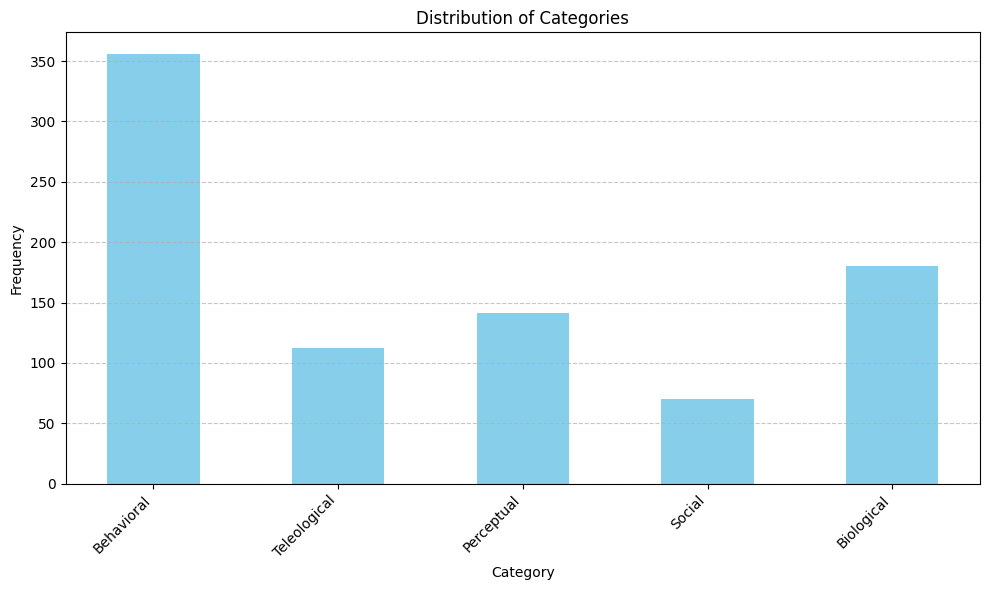

In [8]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Mapping of category numbers to descriptive names
category_names = {
    1: 'Behavioral',
    2: 'Biological',
    3: 'Social',
    4: 'Teleological',
    5: 'Perceptual',
}

# Extract all classifications and flatten them
categories = []
for book in features:
    classification = book['classification']
    if classification:  # Ensure classification is not empty
        # Split the classification string by commas and map to integers
        classification_list = [int(x) for x in classification.split(',')]
        # Map each classification number to the corresponding category name
        for category_num in classification_list:
            if category_num in category_names:
                categories.append(category_names[category_num])

# Count the occurrences of each category
category_counts = Counter(categories)

# Plot the distribution of categories
plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values(), width=0.5, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Distribution of Categories')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





In [12]:
# analyze for each kind, the distribution of generic type

import json
from collections import defaultdict

# Initialize the dictionary to store counts
tag_categories = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

# Set of pronouns to exclude from "Biological Kind" -- generics
#excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

excluded_pronouns = {}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('classification')
        
        for subject_info in subjects:
            subject = subject_info['subject'].lower()
            if subject not in excluded_pronouns:  # Check if the subject is not a pronoun
                for tag in tags:
                    if subject == tag['word'].lower():
                        entity = tag['entity']
                        if entity in tag_categories:
                            tag_categories[entity][category] += 1


process_book(combined_data)

# Convert defaultdict to dict for better readability
tag_categories = {k: dict(v) for k, v in tag_categories.items()}

# Calculate the total count for each tag category
total_counts = {entity: sum(categories.values()) for entity, categories in tag_categories.items()}

# Calculate proportions
tag_proportions = {
    entity: {category: count / total_counts[entity] for category, count in categories.items()}
    for entity, categories in tag_categories.items()
}

# Print the counts and proportions
for entity, categories in tag_categories.items():
    print(f"Entity: {entity}")
    for category, count in categories.items():
        proportion = tag_proportions[entity][category]
        print(f"  Category {category}: Count = {count}, Proportion = {proportion:.2%}")

Entity: Non-Living Kind
  Category Perceptual: Count = 23, Proportion = 11.86%
  Category Other: Count = 110, Proportion = 56.70%
  Category Social: Count = 3, Proportion = 1.55%
  Category Behavioral: Count = 37, Proportion = 19.07%
  Category Teleological: Count = 19, Proportion = 9.79%
  Category Biological: Count = 2, Proportion = 1.03%
Entity: Social Kind/Role
  Category Behavioral: Count = 96, Proportion = 27.75%
  Category Other: Count = 154, Proportion = 44.51%
  Category Perceptual: Count = 4, Proportion = 1.16%
  Category Social: Count = 80, Proportion = 23.12%
  Category Teleological: Count = 5, Proportion = 1.45%
  Category Biological: Count = 7, Proportion = 2.02%
Entity: Biological Kind
  Category Other: Count = 1226, Proportion = 48.75%
  Category Behavioral: Count = 835, Proportion = 33.20%
  Category Social: Count = 232, Proportion = 9.22%
  Category Biological: Count = 73, Proportion = 2.90%
  Category Perceptual: Count = 128, Proportion = 5.09%
  Category Teleologica

In [4]:
# Initialize a list to store sentences matching the criteria
artifact_sentences = []

# Function to process data and extract relevant sentences
def process_artifacts_with_classification(book):
    for sentence_data in book:
        sentence = sentence_data.get('sentence')
        classification = sentence_data.get('classification', [])
        tags = sentence_data.get('tags', [])

        # Check if the classification contains '4'
        if 4 in classification:
            for tag in tags:
                # Check if the tag entity is "Artifacts"
                if tag['entity'] == 'Artifacts':
                    artifact_sentences.append(sentence)
                    break  # No need to check further tags for this sentence

# Process the dataset
process_artifacts_with_classification(combined_data)

# Print the results
print("Sentences with subject 'Artifacts' and classification containing 4:")
for sentence in artifact_sentences:
    print(f"- {sentence}")


Sentences with subject 'Artifacts' and classification containing 4:
- they're called cement mixers
- like traffic signs tell cars where they can go and where they can't go
- and a log skidder can also be a front end loader huh
- a barbecue is when you put the hot dogs and the hamburgers on the grill
- that kind of car is called a station wagon
- that's how keys work
- that's how keys work
- crayons aren't for eating
- beds go in the bed+room
- a poptart is a a little thing you put in a toaster or put in the oven or you can eat it plain and it has like fruit inside of it it's like like dough
- a saddle bag is a bag to put your little treasures in
- teriyaki is a marinade that is made out_of uh
- homework is work that you bring home
- they take a bite that's big enough for them to chew they don't hafta stuff food in their mouth
- because the paint will suffocate them the small bug and the paint goes over them like suf
- the guitar makes music doesn't it
- the box is called a cage
- a pie

In [6]:
import json
from collections import defaultdict

# Initialize the dictionary to store counts and sentences using sets to avoid duplicates
tag_categories = {
    'Non-Living Kind': defaultdict(lambda: {'count': 0, 'sentences': set()}),
    'Social Kind/Role': defaultdict(lambda: {'count': 0, 'sentences': set()}),
    'Biological Kind': defaultdict(lambda: {'count': 0, 'sentences': set()}),
    'Artifacts': defaultdict(lambda: {'count': 0, 'sentences': set()})
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        sentence = sentence_data['sentence']
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('classification')
        
        for subject_info in subjects:
            subject = subject_info['subject'].lower()
            if subject not in excluded_pronouns:  # Check if the subject is not a pronoun
                for tag in tags:
                    if subject == tag['word'].lower():
                        entity = tag['entity']
                        if entity in tag_categories:
                            tag_categories[entity][category]['count'] += 1
                            tag_categories[entity][category]['sentences'].add(sentence)  # Add sentence to set



# Function to save sentences for each category and entity to a file
def save_sentences_by_category(filename):
    with open(filename, 'w') as file:
        for entity, categories in tag_categories.items():
            file.write(f"Entity: {entity}\n")
            for category, data in categories.items():
                file.write(f"  Category {category}: Count = {data['count']}, Sentences:\n")
                for sentence in sorted(data['sentences']):  # Sort sentences for consistent order
                    file.write(f"    - {sentence}\n")
            file.write("\n")  # Add a newline for better separation between entities

# save_sentences_by_category("entity_category_sentences.txt")

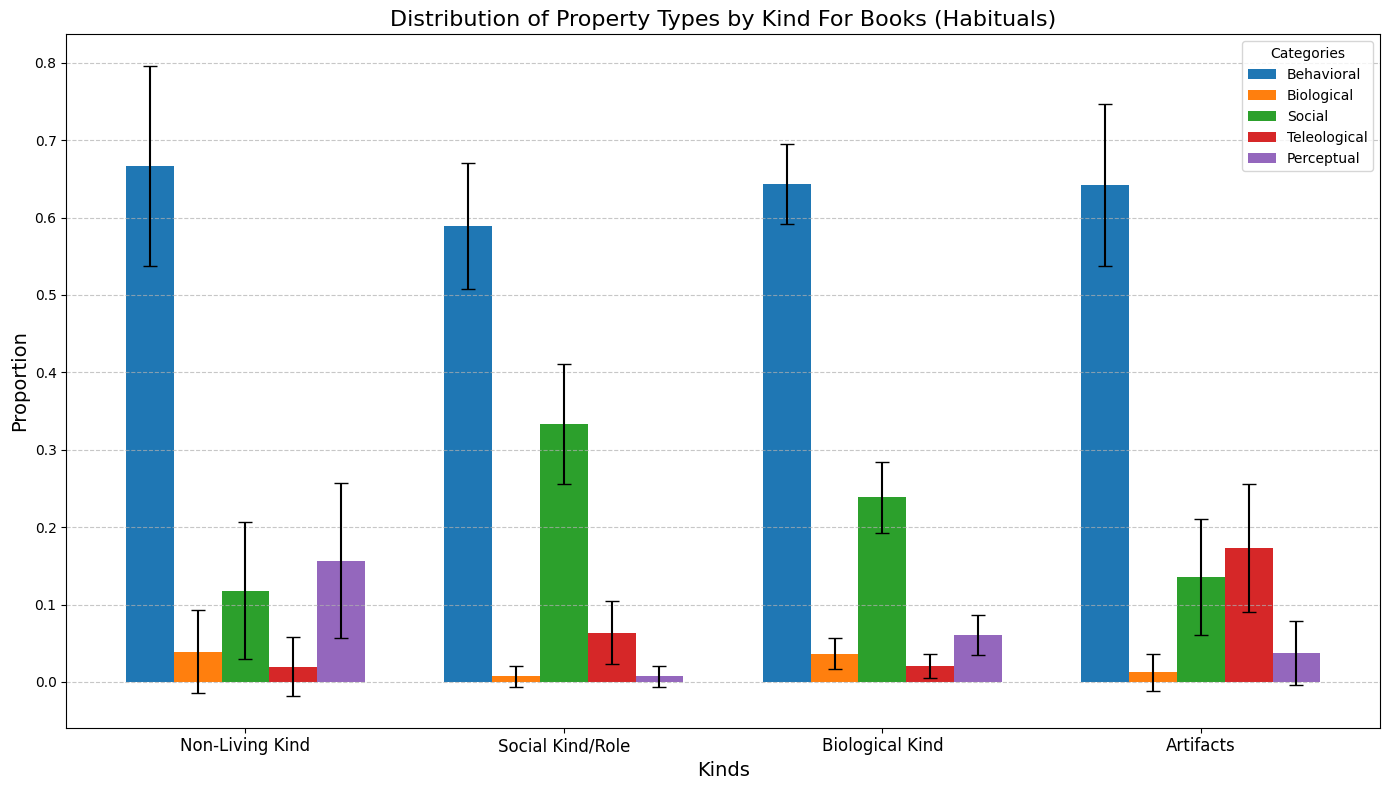

In [16]:
# # plot with confidence interval

import json
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np

# Process and normalize the data
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        classification = sentence_data.get('classification')
        
        if classification:  # Only process if classification exists
            for category_num in classification:  # Process each category in the list
                if category_num in category_names:  # Only process valid categories
                    for subject_info in subjects:
                        subject = subject_info['subject'].lower()
                        if subject not in excluded_pronouns:
                            for tag in tags:
                                if subject == tag['word'].lower():
                                    entity = tag['entity']
                                    if entity in tag_categories:
                                        tag_categories[entity][category_names[category_num]] += 1

# Mapping of category numbers to descriptive names
category_names = {
    1: 'Behavioral',
    2: 'Biological',
    3: 'Social',
    4: 'Teleological',
    5: 'Perceptual',
}

# Initialize the dictionary to store counts for each entity type
tag_categories = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Process the combined data
process_book(combined_data)

# Calculate proportions and confidence intervals
proportions = {}
errors = {}
for entity, counts in tag_categories.items():
    total = sum(counts.values())
    if total > 0:
        proportions[entity] = {cat: count / total for cat, count in counts.items()}
        errors[entity] = {cat: 1.96 * np.sqrt((count / total) * (1 - (count / total)) / total) for cat, count in counts.items()}
    else:
        proportions[entity] = {}
        errors[entity] = {}

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(tag_categories))  # Kinds will now be on the x-axis
width = 0.15  # Width of the bars

# Prepare the data for plotting
kinds = list(tag_categories.keys())  # Non-Living Kind, Social Kind/Role, Biological Kind, Artifacts
categories = list(category_names.values())  # Behavioral, Biological, Social, etc.

# Create bars with error bars for each category
offset = 0
for category in categories:
    values = [proportions[kind].get(category, 0) for kind in kinds]
    errs = [errors[kind].get(category, 0) for kind in kinds]
    ax.bar(x + offset, values, width=width, label=category, yerr=errs, capsize=5)
    offset += width

# Set labels and title
ax.set_xlabel('Kinds', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
ax.set_title('Distribution of Property Types by Kind For Books (Habituals)', fontsize=16)
ax.set_xticks(x + (width * (len(categories) - 1) / 2))
ax.set_xticklabels(kinds, fontsize=12)
ax.legend(title="Categories")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




In [17]:
# logistic regression to predict generic/habitual

combined_data

[{'sentence': 'Every day, Bailey Beaver eats ice cream for breakfast, candy for lunch and cake for dinner.',
  'tags': [{'entity': 'Non-Living Kind',
    'score': 0.9749864339828491,
    'index': 2,
    'word': 'day',
    'start': 6,
    'end': 9},
   {'entity': 'Biological Kind',
    'score': 0.9390778541564941,
    'index': 4,
    'word': 'bailey beaver',
    'start': 11,
    'end': 24},
   {'entity': 'Behavioral',
    'score': 0.9895424842834473,
    'index': 6,
    'word': 'eats',
    'start': 25,
    'end': 29},
   {'entity': 'Artifacts',
    'score': 0.6457382440567017,
    'index': 7,
    'word': 'ice cream',
    'start': 30,
    'end': 39},
   {'entity': 'Artifacts',
    'score': 0.6778071522712708,
    'index': 10,
    'word': 'breakfast',
    'start': 44,
    'end': 53},
   {'entity': 'Artifacts',
    'score': 0.7634249329566956,
    'index': 12,
    'word': 'candy',
    'start': 55,
    'end': 60},
   {'entity': 'Artifacts',
    'score': 0.6542389392852783,
    'index': 14,


In [18]:
# pairwise t-tests (to see if the proportion of one property is statistically higher than the other for each entity)
from itertools import combinations
from scipy.stats import ttest_ind
import json
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        classification = sentence_data.get('classification')
        
        if classification:  # Only process if classification exists
            for category_num in classification:  # Process each category in the list
                if category_num in category_names:  # Only process valid categories
                    for subject_info in subjects:
                        subject = subject_info['subject'].lower()
                        if subject not in excluded_pronouns:
                            for tag in tags:
                                if subject == tag['word'].lower():
                                    entity = tag['entity']
                                    if entity in tag_categories:
                                        tag_categories[entity][category_names[category_num]] += 1


# Mapping of category numbers to descriptive names
category_names = {
    1: 'Behavioral',
    2: 'Biological',
    3: 'Social',
    4: 'Teleological',
    5: 'Perceptual',
}

# Initialize the dictionary to store counts for each entity type
tag_categories = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Process the combined data
process_book(combined_data)

# Convert defaultdict to dict for better readability
for entity in tag_categories:
    total_entity = sum(tag_categories[entity].values())
    tag_categories[entity] = {category: v / total_entity for category, v in tag_categories[entity].items()}

# Pairwise t-tests
print("Pairwise T-Test Results for Property Types by Entity:")
for entity, category_proportions in tag_categories.items():
    print(f"\nEntity: {entity}")
    categories = list(category_proportions.keys())
    for cat1, cat2 in combinations(categories, 2):  # Iterate over all pairs of categories
        # Create binary samples for t-test
        n1 = int(category_proportions[cat1] * 1000)  # Simulate binary counts
        n2 = int(category_proportions[cat2] * 1000)
        samples1 = [1] * n1 + [0] * (1000 - n1)
        samples2 = [1] * n2 + [0] * (1000 - n2)

        # Perform t-test
        t_stat, p_value = ttest_ind(samples1, samples2, equal_var=False)

        # Print results
        print(f"  {cat1} vs. {cat2}:")
        print(f"    T-Statistic = {t_stat:.2f}, P-Value = {p_value:.4f}")
        if p_value < 0.05:
            print("    Significant difference.")
        else:
            print("    No significant difference.")


Pairwise T-Test Results for Property Types by Entity:

Entity: Non-Living Kind
  Behavioral vs. Perceptual:
    T-Statistic = 30.72, P-Value = 0.0000
    Significant difference.
  Behavioral vs. Teleological:
    T-Statistic = 33.87, P-Value = 0.0000
    Significant difference.
  Behavioral vs. Biological:
    T-Statistic = 44.25, P-Value = 0.0000
    Significant difference.
  Behavioral vs. Social:
    T-Statistic = 37.52, P-Value = 0.0000
    Significant difference.
  Perceptual vs. Teleological:
    T-Statistic = 2.32, P-Value = 0.0205
    Significant difference.
  Perceptual vs. Biological:
    T-Statistic = 10.10, P-Value = 0.0000
    Significant difference.
  Perceptual vs. Social:
    T-Statistic = 4.99, P-Value = 0.0000
    Significant difference.
  Teleological vs. Biological:
    T-Statistic = 8.03, P-Value = 0.0000
    Significant difference.
  Teleological vs. Social:
    T-Statistic = 2.70, P-Value = 0.0070
    Significant difference.
  Biological vs. Social:
    T-Statist

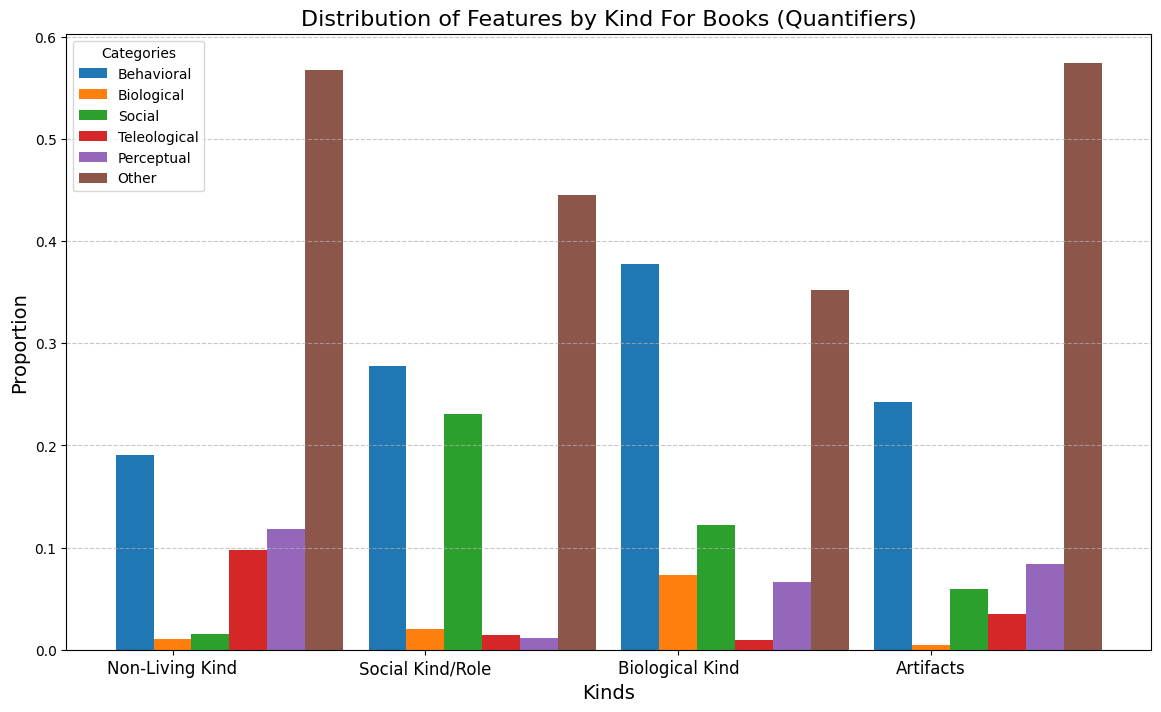

In [14]:
import json
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

# Extract categories for overall distribution
categories = [book['classification'] for book in combined_data]
category_counts = Counter(categories)

# Mapping of category numbers to descriptive names
category_names = {
    "Behavioral": 'Behavioral',
    "Biological": 'Biological',
    "Social": 'Social',
    "Teleological": 'Teleological',
    "Perceptual": 'Perceptual',
    "Other": 'Other'
}

# Replace category numbers with names for overall distribution
category_counts_named = {category_names[k]: v for k, v in category_counts.items()}

# Calculate total counts for normalization
total_overall = sum(category_counts.values())

# Normalize overall counts to proportions
category_proportions_named = {k: v / total_overall for k, v in category_counts_named.items()}

# Initialize the dictionary to store counts for each entity type
tag_categories = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('classification')
        
        for subject_info in subjects:
            subject = subject_info['subject'].lower()
            if subject not in excluded_pronouns:
                for tag in tags:
                    if subject == tag['word'].lower():
                        entity = tag['entity']
                        if entity in tag_categories:
                            tag_categories[entity][category] += 1

process_book(combined_data)

# Convert defaultdict to dict for better readability and replace category numbers with names
for entity in tag_categories:
    total_entity = sum(tag_categories[entity].values())
    tag_categories[entity] = {category_names[k]: v / total_entity for k, v in tag_categories[entity].items()}

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
x = range(len(tag_categories))  # Kinds will now be on the x-axis
width = 0.15  # Width of the bars

# Prepare the data for plotting
kinds = list(tag_categories.keys())  # Non-Living Kind, Social Kind/Role, Biological Kind, Artifacts
categories = list(category_names.values())  # Behavioral, Biological, Social, etc.

# Create bars for each category
offset = 0
for category in categories:
    proportions = [tag_categories[kind].get(category, 0) for kind in kinds]
    ax.bar([xi + offset for xi in x], proportions, width=width, label=category)
    offset += width

# Set labels and title
ax.set_xlabel('Kinds', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
ax.set_title('Distribution of Features by Kind For Books (Quantifiers)', fontsize=16)
ax.set_xticks([xi + width for xi in x])
ax.set_xticklabels(kinds, fontsize=12)
ax.legend(title="Categories")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


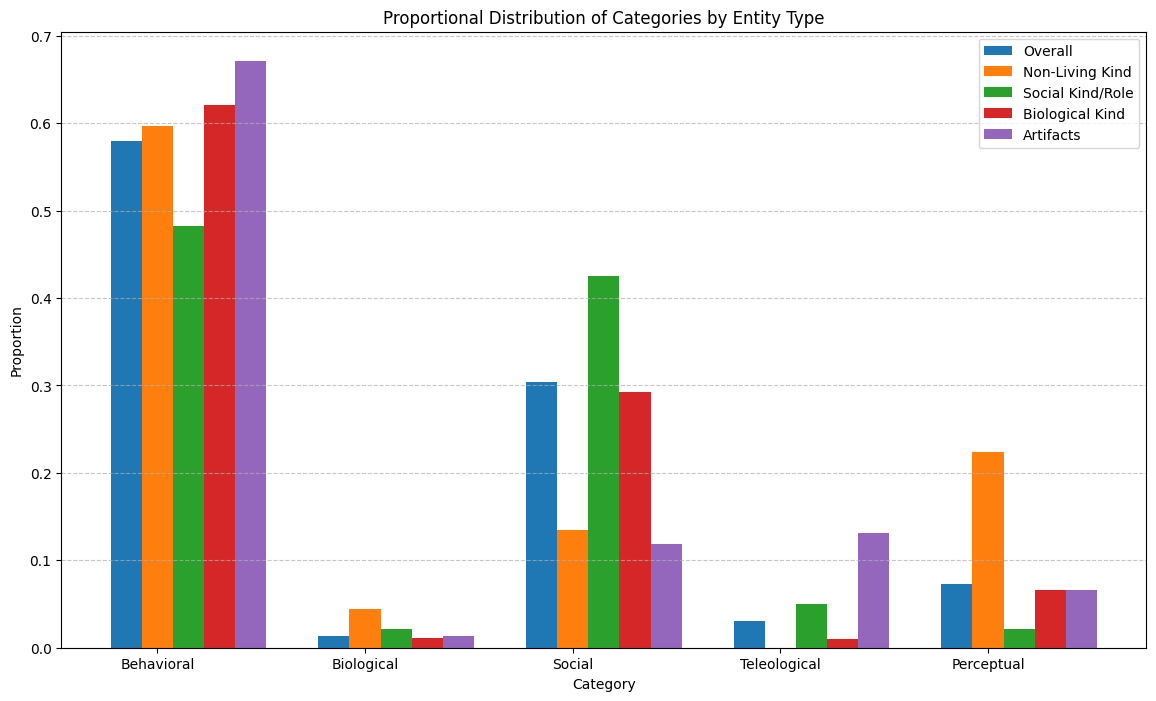

In [47]:
# plot for generalizing

import json
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

# Extract categories for overall distribution
categories = [book['classification'] for book in features]
category_counts = Counter(categories)

# Mapping of category numbers to descriptive names
category_names = {
    "Behavioral": 'Behavioral',
    "Biological": 'Biological',
    "Social": 'Social',
    "Teleological": 'Teleological',
   "Perceptual": 'Perceptual',
   "Other": 'Other'
}

# Replace category numbers with names for overall distribution
category_counts_named = {category_names[k]: v for k, v in category_counts.items()}

# Calculate total counts for normalization
total_overall = sum(category_counts.values())

# Normalize overall counts to proportions
category_proportions_named = {k: v / total_overall for k, v in category_counts_named.items()}

# Initialize the dictionary to store counts for each entity type
tag_categories = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('classification')
        
        for subject_info in subjects:
            subject = subject_info['subject'].lower()
            if subject not in excluded_pronouns:
                for tag in tags:
                    if subject == tag['word'].lower():
                        entity = tag['entity']
                        if entity in tag_categories:
                            tag_categories[entity][category] += 1

process_book(combined_data)

# Convert defaultdict to dict for better readability and replace category numbers with names
for entity in tag_categories:
    total_entity = sum(tag_categories[entity].values())
    tag_categories[entity] = {category_names[k]: v / total_entity for k, v in tag_categories[entity].items()}

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
x = range(len(category_names))
width = 0.15  # Width of the bars

# Plot overall distribution
ax.bar(x, [category_proportions_named.get(name, 0) for name in category_names.values()], width=width, label='Overall')

# Plot each entity type
offset = width
for entity, proportions in tag_categories.items():
    ax.bar([xi + offset for xi in x], [proportions.get(name, 0) for name in category_names.values()], width=width, label=entity)
    offset += width

ax.set_xlabel('Category')
ax.set_ylabel('Proportion')
ax.set_title('Proportional Distribution of Categories by Entity Type')
ax.set_xticks([xi + width for xi in x])
ax.set_xticklabels(category_names.values())
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

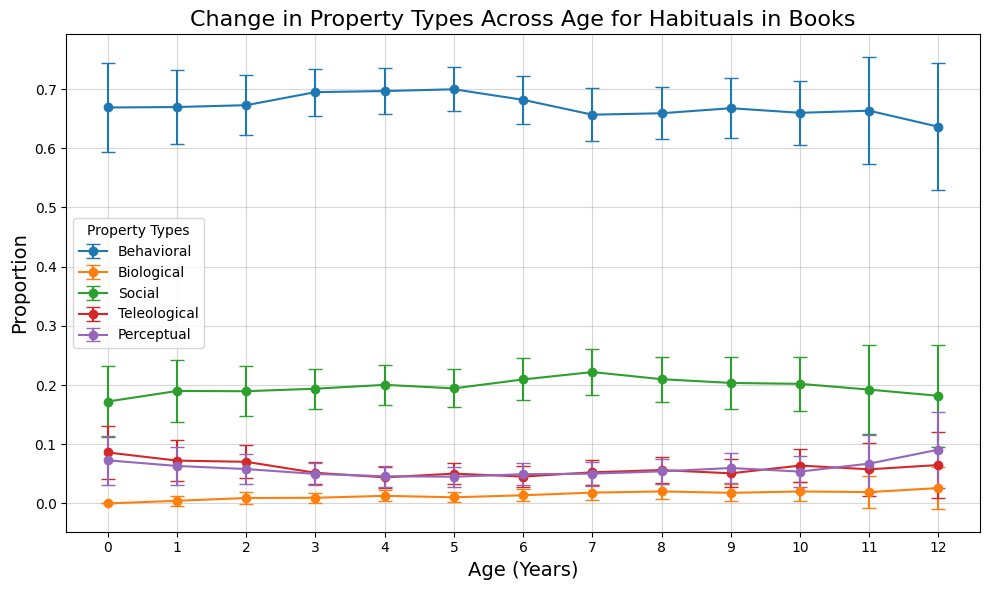

In [44]:
# change across age for property types (for books, where age is an interval)

import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Mapping of category numbers to descriptive names
category_names = {
    1: 'Behavioral',
    2: 'Biological',
    3: 'Social',
    4: 'Teleological',
    5: 'Perceptual',
}

# Initialize dictionary to store counts for each age and property type
age_property_counts = defaultdict(lambda: defaultdict(int))

# Process the data to count occurrences of property types by age range (age_min to age_max)
for book in combined_data:
    age_min = book.get('age_min', None)
    age_max = book.get('age_max', None)
    age_min = int(age_min)
    age_max = int(age_max)
    classification = book.get('classification', [])

    if age_min is not None and age_max is not None and classification:
        for category_num in classification:
            if category_num in category_names:  # Only process valid categories
                property_type = category_names[category_num]
                for age in range(age_min, age_max + 1):  # Include all ages in the range
                    age_property_counts[age][property_type] += 1

# Define age range (0 to 12)
ages = range(0, 13)

# Initialize a dictionary to store proportions and error margins for each property type
property_proportions = {property_type: [] for property_type in category_names.values()}
property_errors = {property_type: [] for property_type in category_names.values()}

# Calculate proportions and confidence intervals for each property type at each age
for age in ages:
    total_count = sum(age_property_counts[age].values())
    for property_type in category_names.values():
        count = age_property_counts[age].get(property_type, 0)
        proportion = count / total_count if total_count > 0 else 0
        property_proportions[property_type].append(proportion)

        # Calculate error margin (confidence interval)
        if total_count > 0:
            se = np.sqrt(proportion * (1 - proportion) / total_count)
            margin_of_error = 1.96 * se  # 95% confidence interval
        else:
            margin_of_error = 0
        property_errors[property_type].append(margin_of_error)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for property_type in category_names.values():
    ax.errorbar(ages, property_proportions[property_type], yerr=property_errors[property_type],
                label=property_type, capsize=5, marker='o', linestyle='-')

# Customize the plot
ax.set_xlabel('Age (Years)', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
ax.set_title('Change in Property Types Across Age for Habituals in Books', fontsize=16)
ax.set_xticks(ages)
ax.legend(title='Property Types')
ax.grid(alpha=0.5)

plt.tight_layout()
plt.show()






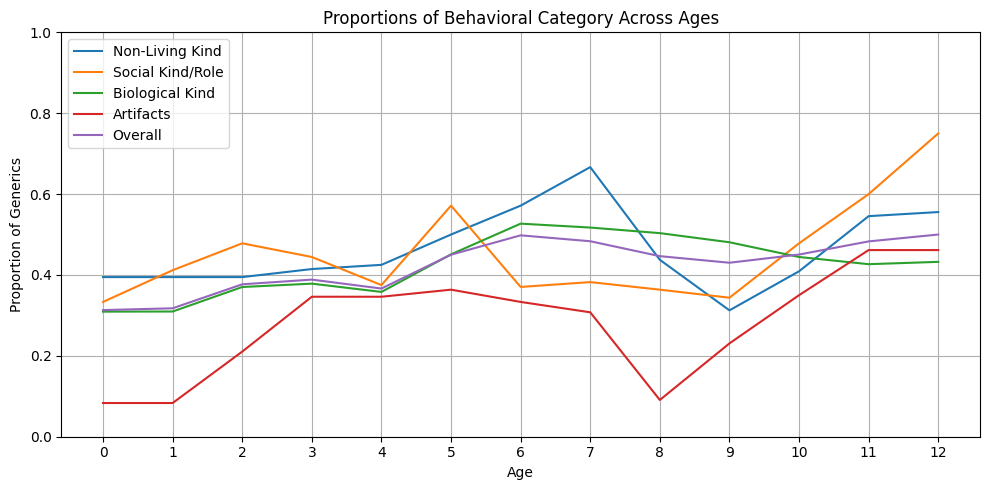

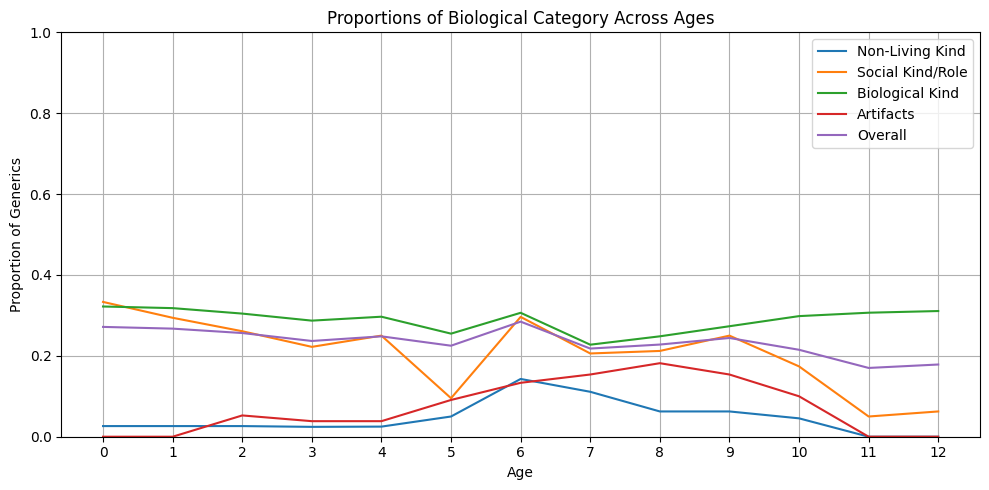

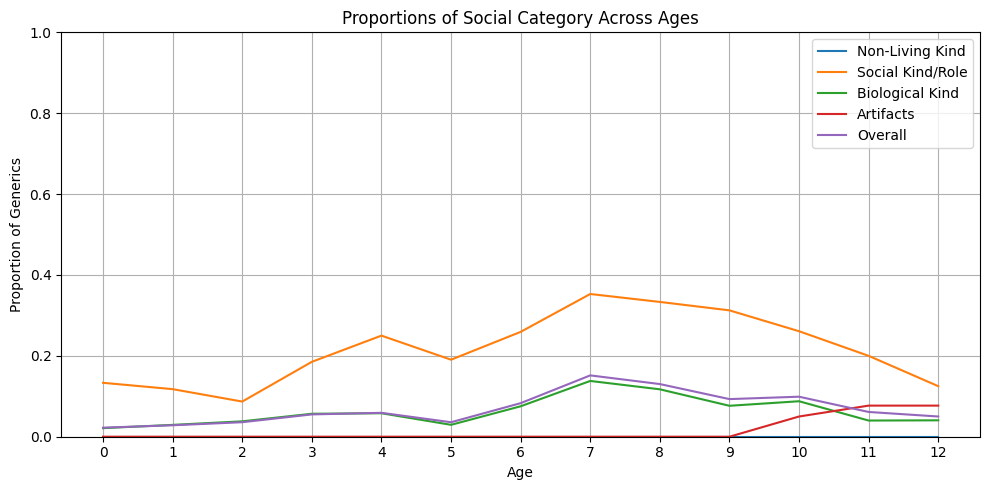

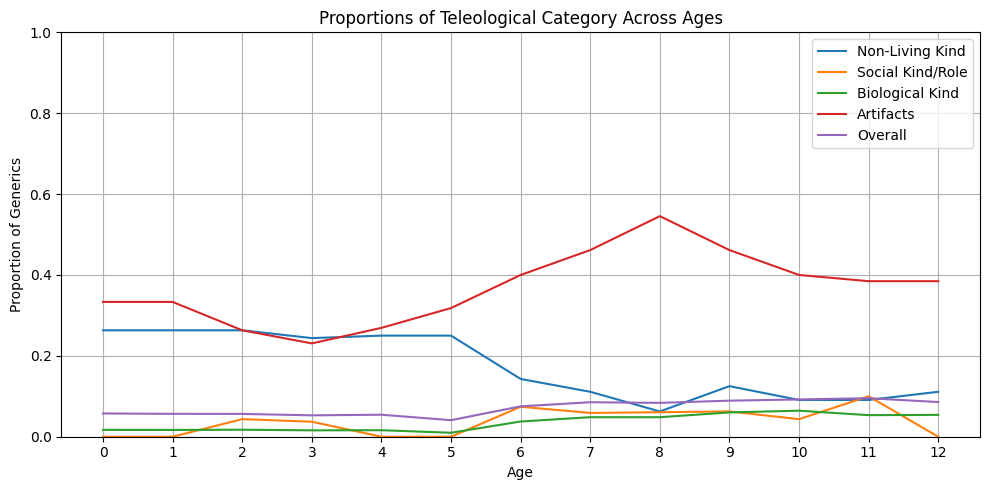

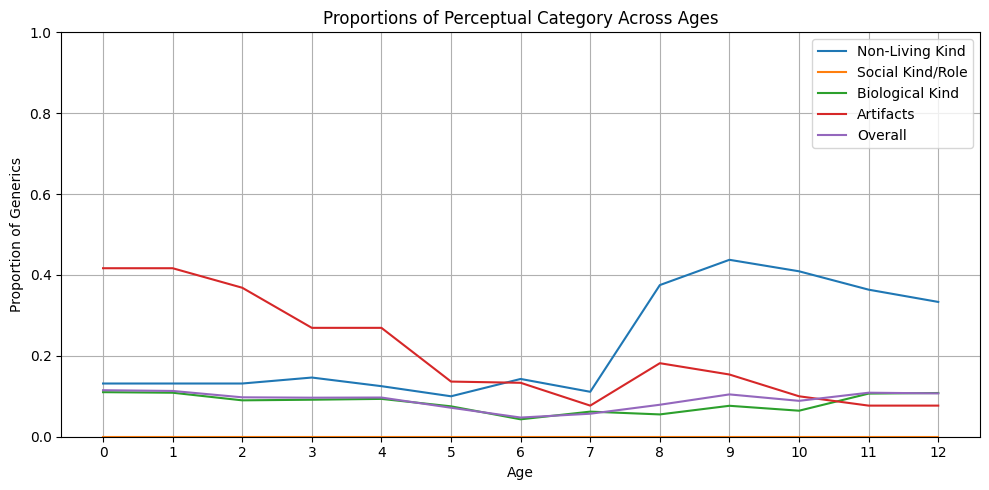

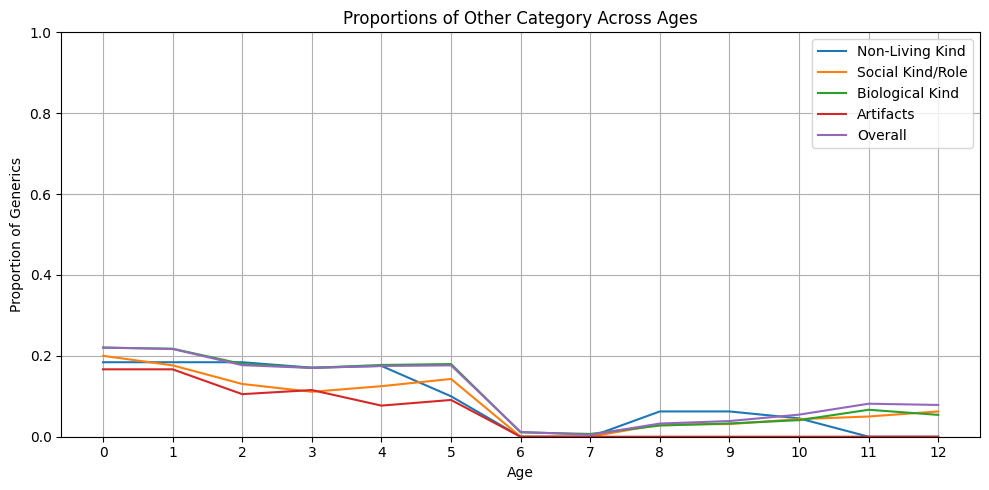

In [13]:
# change across age plot for each feature
# note to self: combined_data is the same as features.json

import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Mapping of category numbers to descriptive names
category_names = {
    "Behavioral": 'Behavioral',
    "Biological": 'Biological',
    "Social": 'Social',
    "Teleological": 'Teleological',
   "Perceptual": 'Perceptual',
   "Other": 'Other'
}

# Initialize the dictionary to store counts for each entity type by age
tag_categories_by_age = {
    'Non-Living Kind': defaultdict(lambda: defaultdict(int)),
    'Social Kind/Role': defaultdict(lambda: defaultdict(int)),
    'Biological Kind': defaultdict(lambda: defaultdict(int)),
    'Artifacts': defaultdict(lambda: defaultdict(int)),
    'Overall': defaultdict(lambda: defaultdict(int))
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('classification')
        age_min = int(sentence_data['age_min'])
        age_max = int(sentence_data['age_max'])
        
        for age in range(age_min, age_max + 1):
            for subject_info in subjects:
                subject = subject_info['subject'].lower()
                if subject not in excluded_pronouns:
                    for tag in tags:
                        if subject == tag['word'].lower():
                            entity = tag['entity']
                            if entity in tag_categories_by_age:
                                tag_categories_by_age[entity][age][category] += 1
                            tag_categories_by_age['Overall'][age][category] += 1

# Process the combined data
process_book(combined_data)

# Function to calculate proportions for each category by age
def calculate_category_proportions(entity_type, category_name):
    proportions = []
    for age in age_ranges:
        total_count = sum(tag_categories_by_age[entity_type][age].values())
        if total_count == 0:
            proportions.append(0)
        else:
            category_count = tag_categories_by_age[entity_type][age].get(category_name, 0)
            proportions.append(category_count / total_count)
    return proportions

# Plot the proportions for each category across ages
age_ranges = range(0, 13)  # Assuming age ranges from 0 to 17

for category_num, category_name in category_names.items():
    plt.figure(figsize=(10, 5))
    
    for entity_type in tag_categories_by_age.keys():
        proportions = calculate_category_proportions(entity_type, category_num)
        plt.plot(age_ranges, proportions, label=entity_type)

    plt.title(f'Proportions of {category_name} Category Across Ages')
    plt.xlabel('Age')
    plt.ylabel('Proportion of Generics')
    plt.xticks(age_ranges)
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [16]:
# change across age overall plot features for generics

# just one line showing the change across age
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Mapping of category numbers to descriptive names
category_names = {
    "Behavioral": 'Behavioral',
    "Biological": 'Biological',
    "Social": 'Social',
    "Teleological": 'Teleological',
   "Perceptual": 'Perceptual',
   "Other": 'Other'
}

# Initialize the dictionary to store counts for each entity type by age
tag_categories_by_age = {
    'Non-Living Kind': defaultdict(lambda: defaultdict(int)),
    'Social Kind/Role': defaultdict(lambda: defaultdict(int)),
    'Biological Kind': defaultdict(lambda: defaultdict(int)),
    'Artifacts': defaultdict(lambda: defaultdict(int)),
    'Overall': defaultdict(lambda: defaultdict(int))
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('classification')
        age_min = int(sentence_data['age_min'])
        age_max = int(sentence_data['age_max'])
        
        for age in range(age_min, age_max + 1):
            for subject_info in subjects:
                subject = subject_info['subject'].lower()
                if subject not in excluded_pronouns:
                    for tag in tags:
                        if subject == tag['word'].lower():
                            entity = tag['entity']
                            if entity in tag_categories_by_age:
                                tag_categories_by_age[entity][age][category] += 1
                            tag_categories_by_age['Overall'][age][category] += 1

# Process the combined data
process_book(features)

# Function to calculate overall proportions for each category by age
def calculate_overall_category_proportions(category_name):
    proportions = []
    for age in age_ranges:
        total_count = sum(tag_categories_by_age['Overall'][age].values())
        if total_count == 0:
            proportions.append(0)
        else:
            category_count = tag_categories_by_age['Overall'][age].get(category_name, 0)
            proportions.append(category_count / total_count)
    return proportions

# Plot the proportions for each category across ages
age_ranges = range(0, 13)  # Assuming age ranges from 0 to 17
plt.figure(figsize=(10, 5))

for category_num, category_name in category_names.items():
    proportions = calculate_overall_category_proportions(category_num)
    plt.plot(age_ranges, proportions, label=category_name)

plt.title('Proportions of Each Category Across Ages')
plt.xlabel('Age')
plt.ylabel('Proportion of Generic Sentences')
plt.xticks(age_ranges)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'age_min'

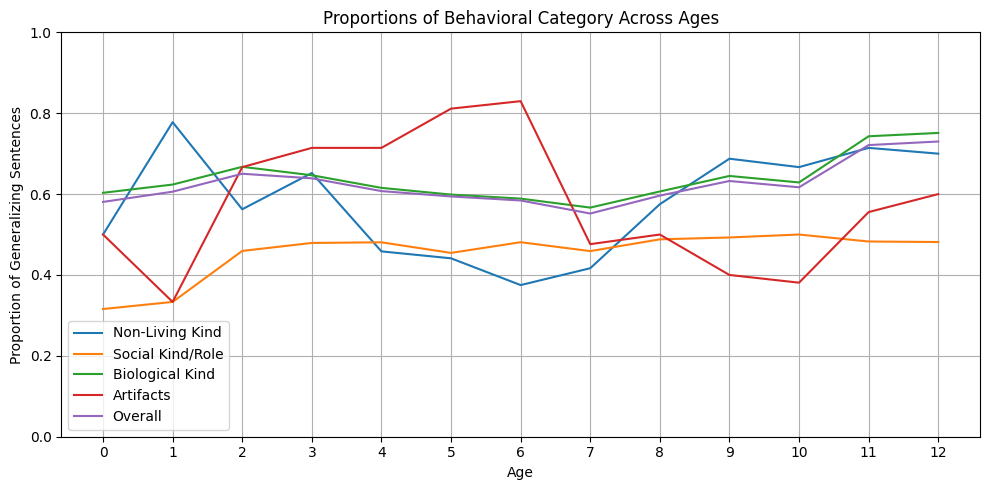

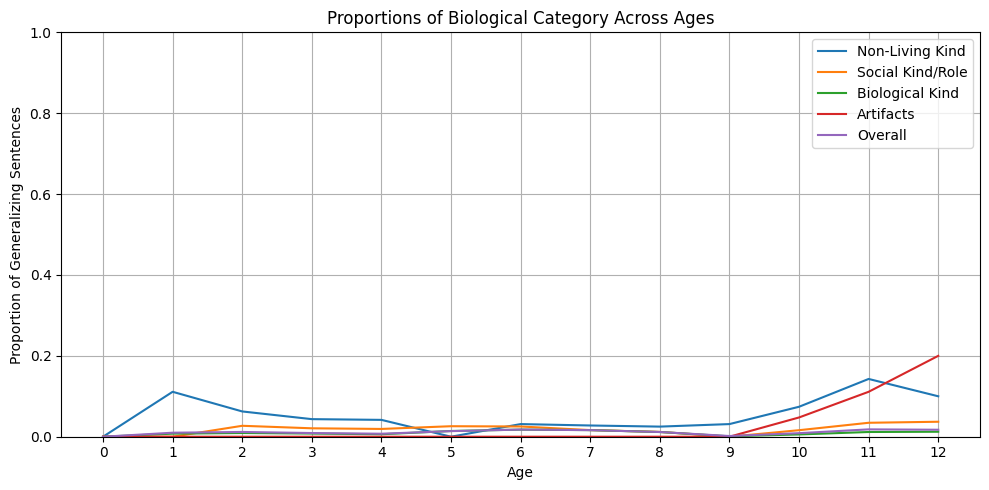

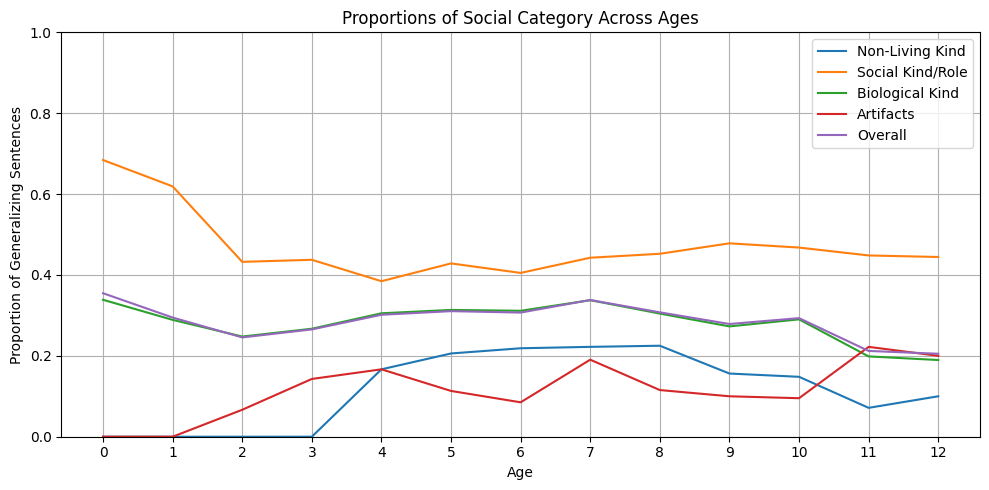

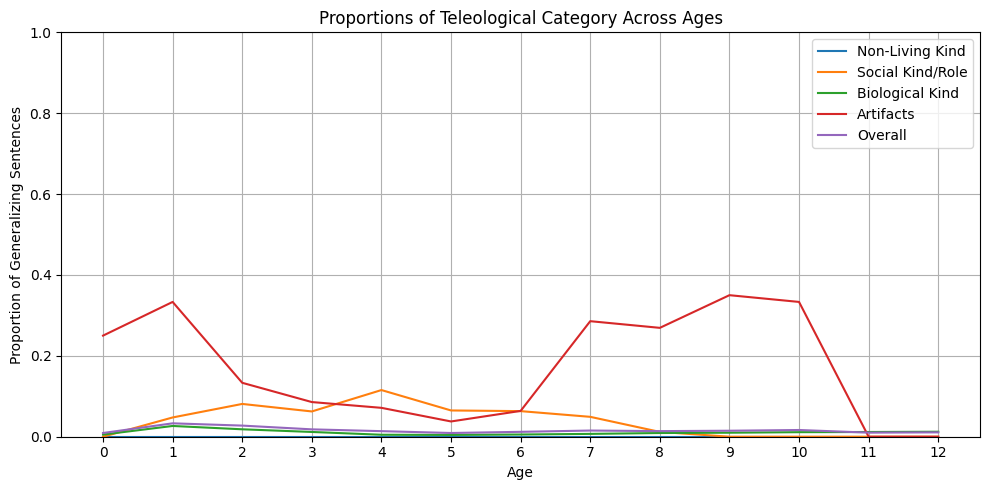

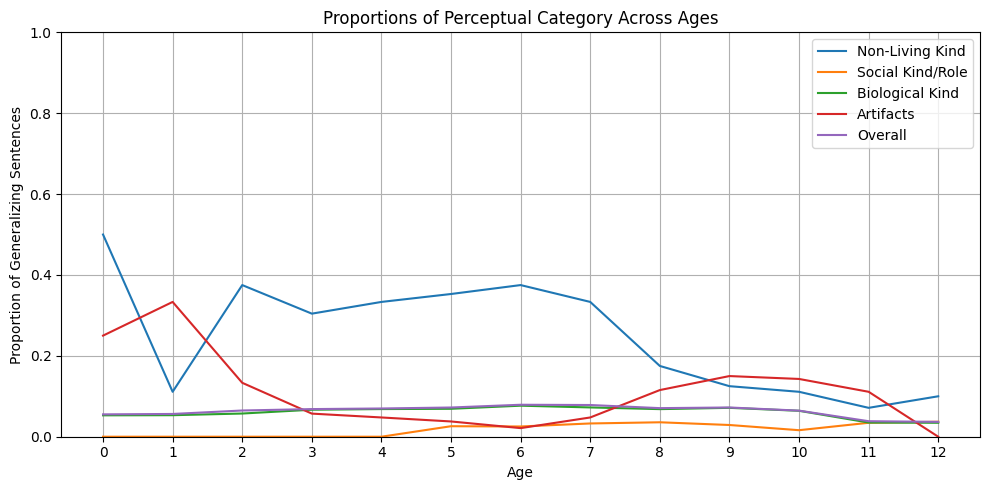

In [49]:
# plot for generalizing

# change across age plot for each feature
# note to self: combined_data is the same as features.json

import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Mapping of category numbers to descriptive names
category_names = {
    "1": 'Behavioral',
    "2": 'Biological',
    "3": 'Social',
    "4": 'Teleological',
    "5": 'Perceptual'
}

# Initialize the dictionary to store counts for each entity type by age
tag_categories_by_age = {
    'Non-Living Kind': defaultdict(lambda: defaultdict(int)),
    'Social Kind/Role': defaultdict(lambda: defaultdict(int)),
    'Biological Kind': defaultdict(lambda: defaultdict(int)),
    'Artifacts': defaultdict(lambda: defaultdict(int)),
    'Overall': defaultdict(lambda: defaultdict(int))
}

# Set of pronouns to exclude from "Biological Kind"
#excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}
excluded_pronouns = {}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('classification')
        age_min = int(sentence_data['age_min'])
        age_max = int(sentence_data['age_max'])
        
        for age in range(age_min, age_max + 1):
            for subject_info in subjects:
                subject = subject_info['subject'].lower()
                if subject not in excluded_pronouns:
                    for tag in tags:
                        if subject == tag['word'].lower():
                            entity = tag['entity']
                            if entity in tag_categories_by_age:
                                tag_categories_by_age[entity][age][category] += 1
                            tag_categories_by_age['Overall'][age][category] += 1

# Process the combined data
process_book(combined_data)

# Function to calculate proportions for each category by age
def calculate_category_proportions(entity_type, category_name):
    proportions = []
    for age in age_ranges:
        total_count = sum(tag_categories_by_age[entity_type][age].values())
        if total_count == 0:
            proportions.append(0)
        else:
            category_count = tag_categories_by_age[entity_type][age].get(category_name, 0)
            proportions.append(category_count / total_count)
    return proportions

# Plot the proportions for each category across ages
age_ranges = range(0, 13)  # Assuming age ranges from 0 to 17

for category_num, category_name in category_names.items():
    plt.figure(figsize=(10, 5))
    
    for entity_type in tag_categories_by_age.keys():
        proportions = calculate_category_proportions(entity_type, category_num)
        plt.plot(age_ranges, proportions, label=entity_type)

    plt.title(f'Proportions of {category_name} Category Across Ages')
    plt.xlabel('Age')
    plt.ylabel('Proportion of Generalizing Sentences')
    plt.xticks(age_ranges)
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
